<a href="https://colab.research.google.com/github/Praveen76/Fashion-MNIST-Classification-using-Dense-Neural-Network/blob/main/Fashion_MNIST_Classification_using_Dense_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
# !pip -qq install catboost

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [ ]:
# import json
# import os

# # Set the Kaggle API key path
# kaggle_key_path = '/content/drive/MyDrive/DS_Learning/.kaggle/kaggle.json'
# os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/DS_Learning/.kaggle'

# # Check if the key is correctly set
# with open(kaggle_key_path, 'r') as kaggle_key_file:
#     kaggle_key_data = json.load(kaggle_key_file)
#     print(f'Kaggle API username: {kaggle_key_data["username"]}')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, InputLayer, Conv1D, ReLU, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from keras import Input
from sklearn.metrics import confusion_matrix, classification_report
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
#import warnings
#warnings.filterwarnings("ignore")

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [ ]:
# Using Keras to load the dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

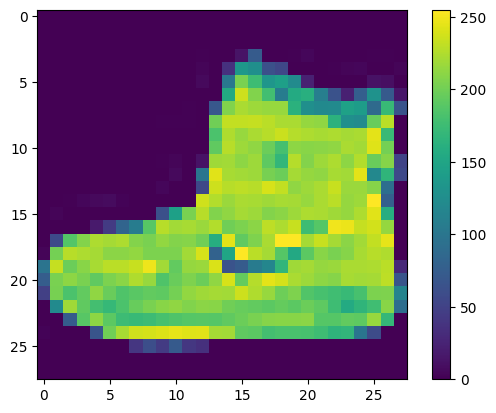

In [ ]:
plt.figure()
plt.imshow(X_train_full[0])
plt.colorbar()
plt.grid(False)
plt.show()

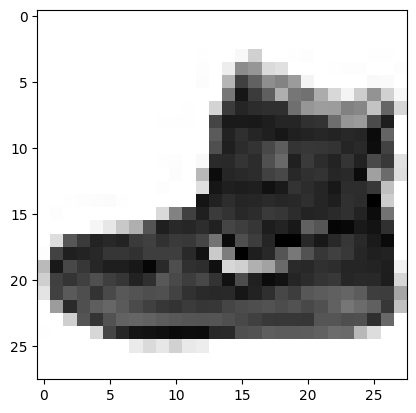

In [ ]:
plt.imshow(X_train_full[0], cmap='Greys')

Label:  9


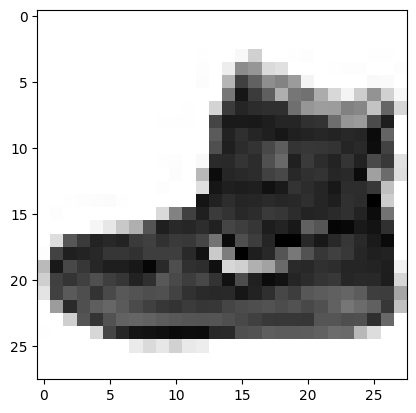

In [ ]:
# Visualize an image from data
print("Label: ", y_train_full[0])
plt.imshow(X_train_full[0], cmap='Greys')
plt.show()

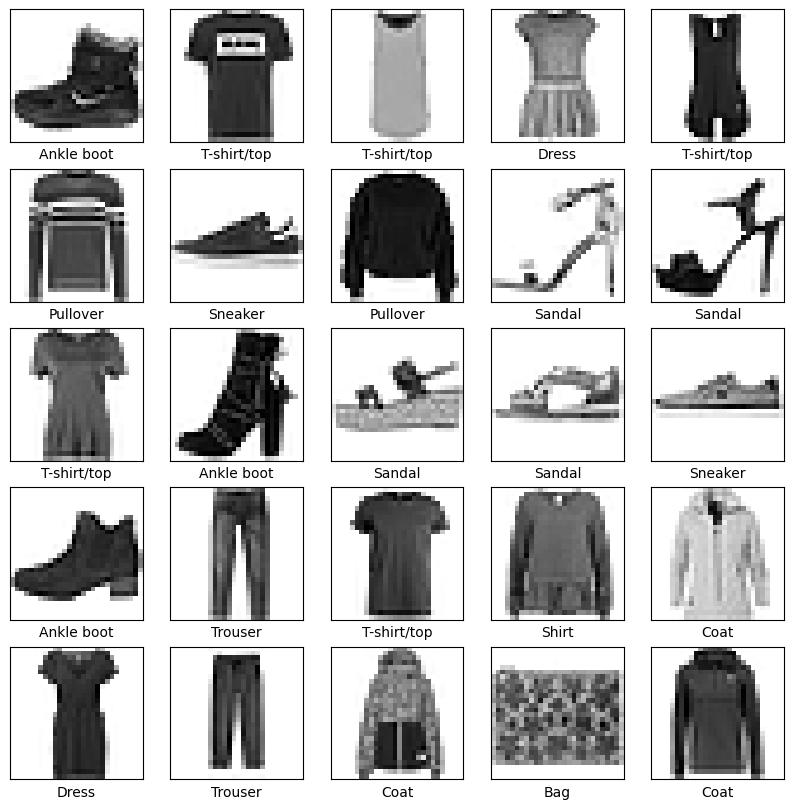

In [ ]:
plt.figure(figsize=(10,10))
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] # Added the class_names list
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_full[i]]) # Changed X_train_full to y_train_full
plt.show()

In [ ]:
# Shape and datatype of X_train
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [ ]:
# Shape and datatype of y_train
y_train_full.shape, y_train_full.dtype

((60000,), dtype('uint8'))

In [ ]:
# Split into training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=123)
X_train.shape, X_val.shape

((54000, 28, 28), (6000, 28, 28))

In [ ]:
# Reshape train, test, and validation data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

In [ ]:
# Normalize dataset
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

In [ ]:
# unique classes
pd.Series(y_train).nunique()

10

Use the sequential API to make a model with the following dense layers:

* i. layer-1: 128 neurons, relu activation

* ii. layer-2: X neurons, softmax activation (Deduce the value of X based on the number of classes in the MNIST fashion dataset)

* iii. Define the input_shape=(None, Y) for the model. Deduce Y from the dataset

* iV. Plot the model (plot_model())

In [ ]:
seq_model = keras.Sequential()
seq_model.add(Flatten(input_shape=(28, 28)))
seq_model.add(Dense(128, activation="relu"))
seq_model.add(Dense(10, activation="softmax"))

In [ ]:
seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
plot_model(seq_model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
seq_model.compile(optimizer ="rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [ ]:
callbacks_list = [EarlyStopping(monitor="val_loss", patience=2),
                  ModelCheckpoint("mnist_model_checkpoint",save_best_only=True),
                  TensorBoard(log_dir="/tensorboard_files")]

In [ ]:
history = seq_model.fit(x=X_train, y=y_train, epochs=10,
                    validation_data=(X_val, y_val),
                   callbacks=callbacks_list,)

Epoch 1/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.5156 - accuracy: 0.8180 - val_loss: 0.5523 - val_accuracy: 0.8007
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3797 - accuracy: 0.8634 - val_loss: 0.3560 - val_accuracy: 0.8742
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3486 - accuracy: 0.8731 - val_loss: 0.3756 - val_accuracy: 0.8662
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3272 - accuracy: 0.8839 - val_loss: 0.3358 - val_accuracy: 0.8797
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3144 - accuracy: 0.8884 - val_loss: 0.3352 - val_accuracy: 0.8883
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3036 - accuracy: 0.8924 - val_loss: 0.3220 - val_accuracy: 0.8882
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2958 - accuracy: 0.8954 - val_loss: 0.3661 - val_accuracy:

In [ ]:
predictions = np.argmax(seq_model.predict(X_test[:5]), axis=1)
print(predictions)

1/1 [==============================] - 0s 74ms/step
[9 2 1 1 6]


In [ ]:
data = pd.DataFrame(history.history)
data.head()

,loss,accuracy,val_loss,val_accuracy
0,0.515593,0.818037,0.552310,0.800667
1,0.379657,0.863389,0.355996,0.874167
2,0.348601,0.873111,0.375627,0.866167
3,0.327192,0.883889,0.335817,0.879667
4,0.314440,0.888352,0.335247,0.888333


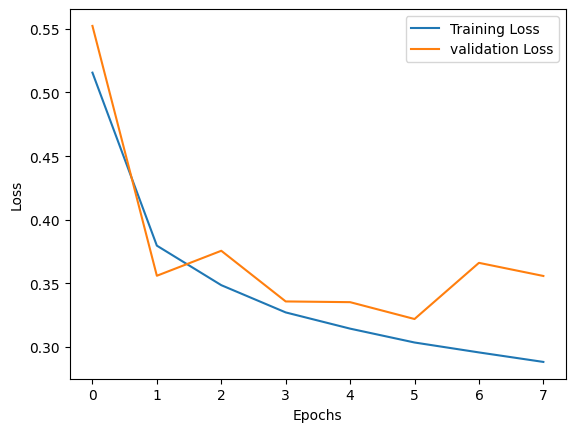

In [ ]:
plt.plot(range(data.shape[0]),data['loss'], label="Training Loss")
plt.plot(range(data.shape[0]),data['val_loss'],label="validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
class_predicted = np.argmax(seq_model.predict(X_test),axis=1)
accuracy = np.sum(class_predicted == y_test)/len(y_test)
print(accuracy)

313/313 [==============================] - 0s 1ms/step
0.8669


In [ ]:
print(classification_report(y_test, class_predicted))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.73      0.76      1000
           3       0.86      0.90      0.88      1000
           4       0.66      0.91      0.76      1000
           5       0.98      0.94      0.96      1000
           6       0.72      0.52      0.61      1000
           7       0.93      0.97      0.95      1000
           8       0.98      0.97      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.86     10000
weighted avg       0.87      0.87      0.86     10000



In [ ]:
print(confusion_matrix(y_test, class_predicted))

[[811   4  11  37   5   3 120   0   9   0]
 [  5 972   1  20   0   0   2   0   0   0]
 [ 14   1 726  11 203   0  44   0   1   0]
 [ 17   7   8 895  56   0  15   0   2   0]
 [  0   1  57  23 905   0  14   0   0   0]
 [  0   0   0   1   0 945   0  27   3  24]
 [129   1  99  42 197   1 523   0   8   0]
 [  0   0   0   0   0  15   0 969   0  16]
 [  5   0   2   6   6   1   5   4 971   0]
 [  0   0   0   0   0   3   1  44   0 952]]


In [ ]:
# Use the functional API to make this model. You can use any shape for the layers. Use the plot_model() utility to show the model graph.

inputs = Input(shape=(28,28), name="input_layer")
input_flattened = Flatten()(inputs)
features = Dense(128, activation="relu",name="first_layer")(input_flattened) #f(inputs)
outputs = Dense(10, activation="softmax",
                             name="output_layer")(features) #f(features)
fun_model = keras.Model(inputs,outputs)

In [ ]:
fun_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 first_layer (Dense)         (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
plot_model(fun_model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
fun_model.compile(optimizer ="rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [ ]:
history = fun_model.fit(x=X_train, y=y_train, epochs=10,
                    validation_data=(X_val, y_val))#,
                   #callbacks=callbacks_list,)

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5175 - accuracy: 0.8167 - val_loss: 0.4233 - val_accuracy: 0.8490
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3832 - accuracy: 0.8614 - val_loss: 0.3536 - val_accuracy: 0.8763
Epoch 3/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3494 - accuracy: 0.8740 - val_loss: 0.3723 - val_accuracy: 0.8712
Epoch 4/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3286 - accuracy: 0.8837 - val_loss: 0.3635 - val_accuracy: 0.8785
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3151 - accuracy: 0.8879 - val_loss: 0.3462 - val_accuracy: 0.8817
Epoch 6/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3054 - accuracy: 0.8910 - val_loss: 0.3560 - val_accuracy: 0.8768
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2932 - accuracy: 0.8949 - val_loss: 0.3407 - val_accuracy:

In [ ]:
data = pd.DataFrame(history.history)
data.head(11)

,loss,accuracy,val_loss,val_accuracy
0,0.517488,0.816704,0.423298,0.849000
1,0.383184,0.861407,0.353571,0.876333
2,0.349368,0.874018,0.372345,0.871167
3,0.328595,0.883704,0.363467,0.878500
4,0.315115,0.887870,0.346163,0.881667
5,0.305387,0.891019,0.355968,0.876833
6,0.293157,0.894870,0.340663,0.886167
7,0.286416,0.899574,0.341489,0.882500
8,0.277969,0.903241,0.381671,0.874667
9,0.273448,0.904926,0.395268,0.871167


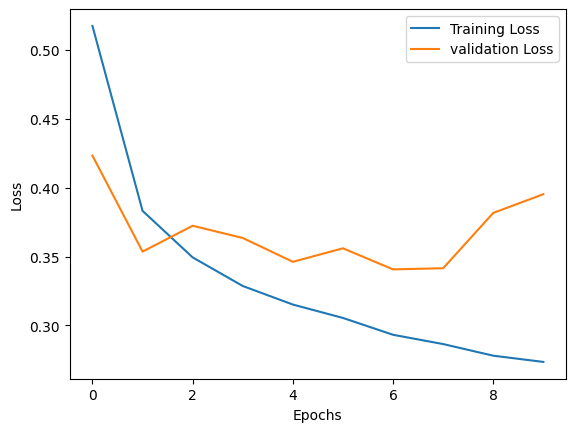

In [ ]:
plt.plot(range(data.shape[0]),data['loss'], label="Training Loss")
plt.plot(range(data.shape[0]),data['val_loss'],label="validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

313/313 [==============================] - 0s 1ms/step


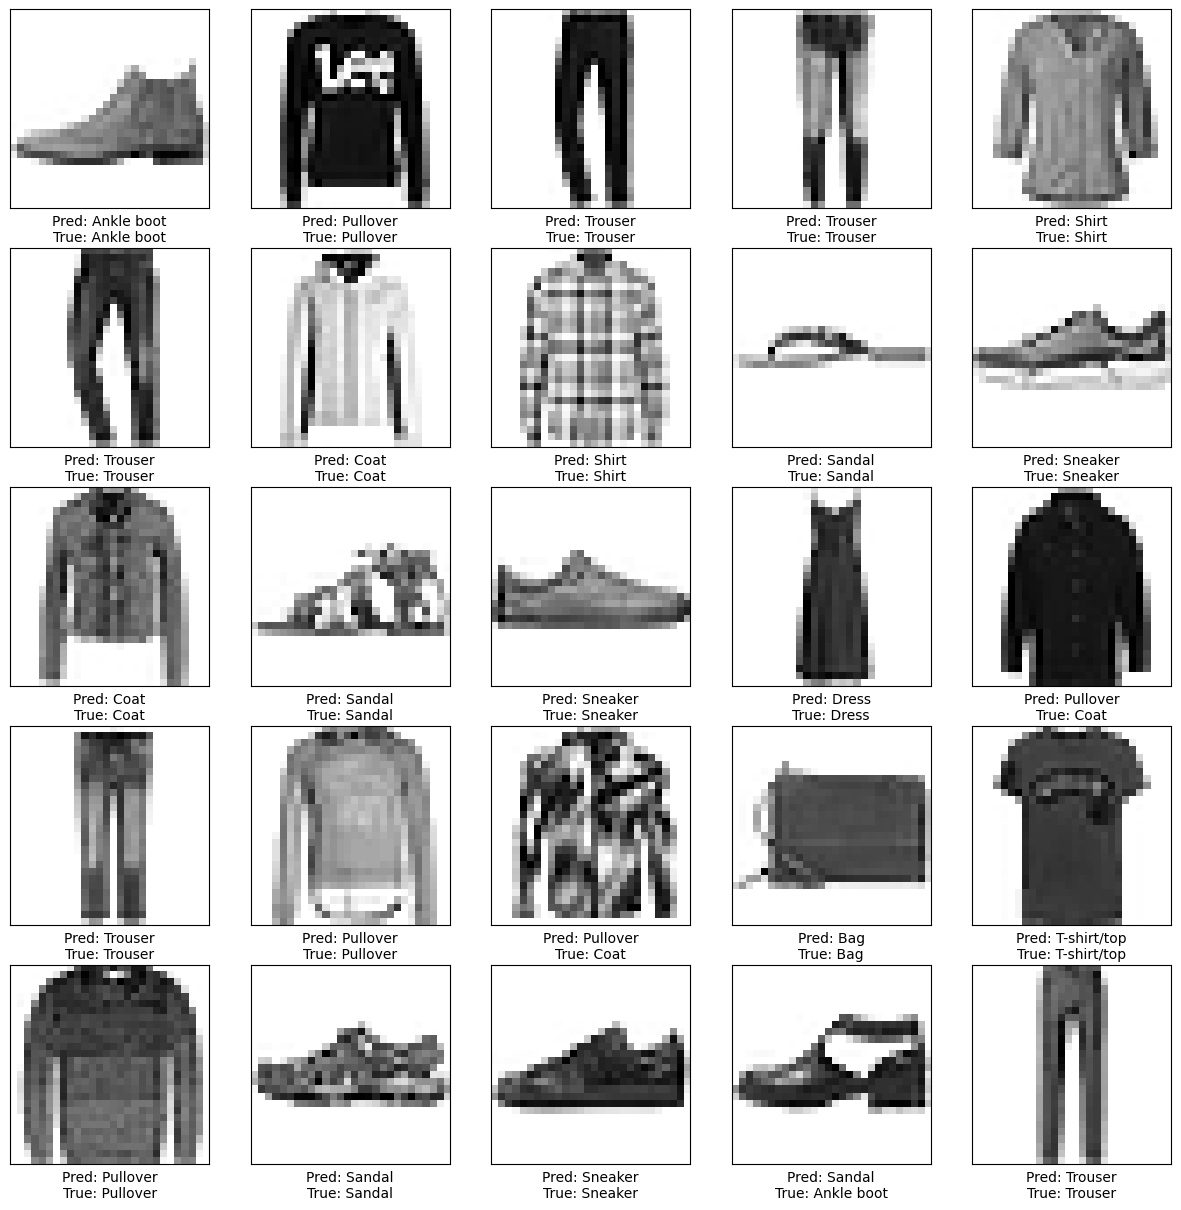

Accuracy: 0.86


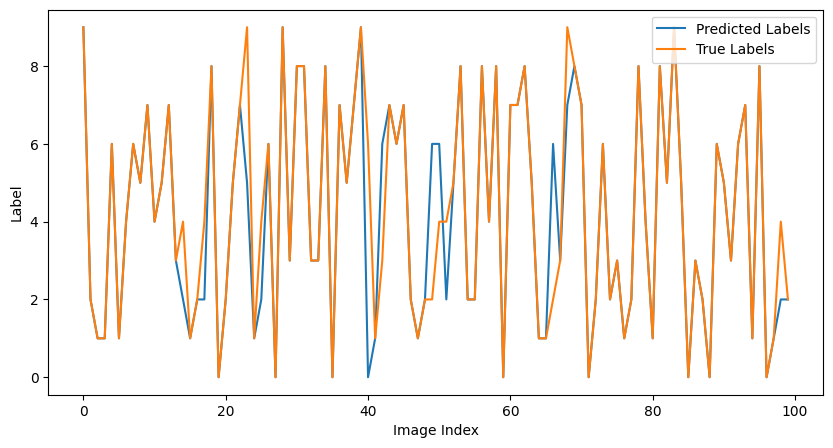

In [ ]:
# Get predictions for the test images
predictions = fun_model.predict(X_test)

# Get the predicted class for each image
predicted_labels = np.argmax(predictions, axis=1)

# Plot the first 25 test images with their predicted labels
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[y_test[i]]}")
plt.show()

# Calculate the accuracy
accuracy = np.sum(predicted_labels == y_test) / len(y_test)
print(f"Accuracy: {accuracy:.2f}")

# Plot the predicted labels and true labels
plt.figure(figsize=(10, 5))
plt.plot(predicted_labels[:100], label="Predicted Labels")
plt.plot(y_test[:100], label="True Labels")
plt.xlabel("Image Index")
plt.ylabel("Label")
plt.legend()
plt.show()


313/313 [==============================] - 0s 1ms/step


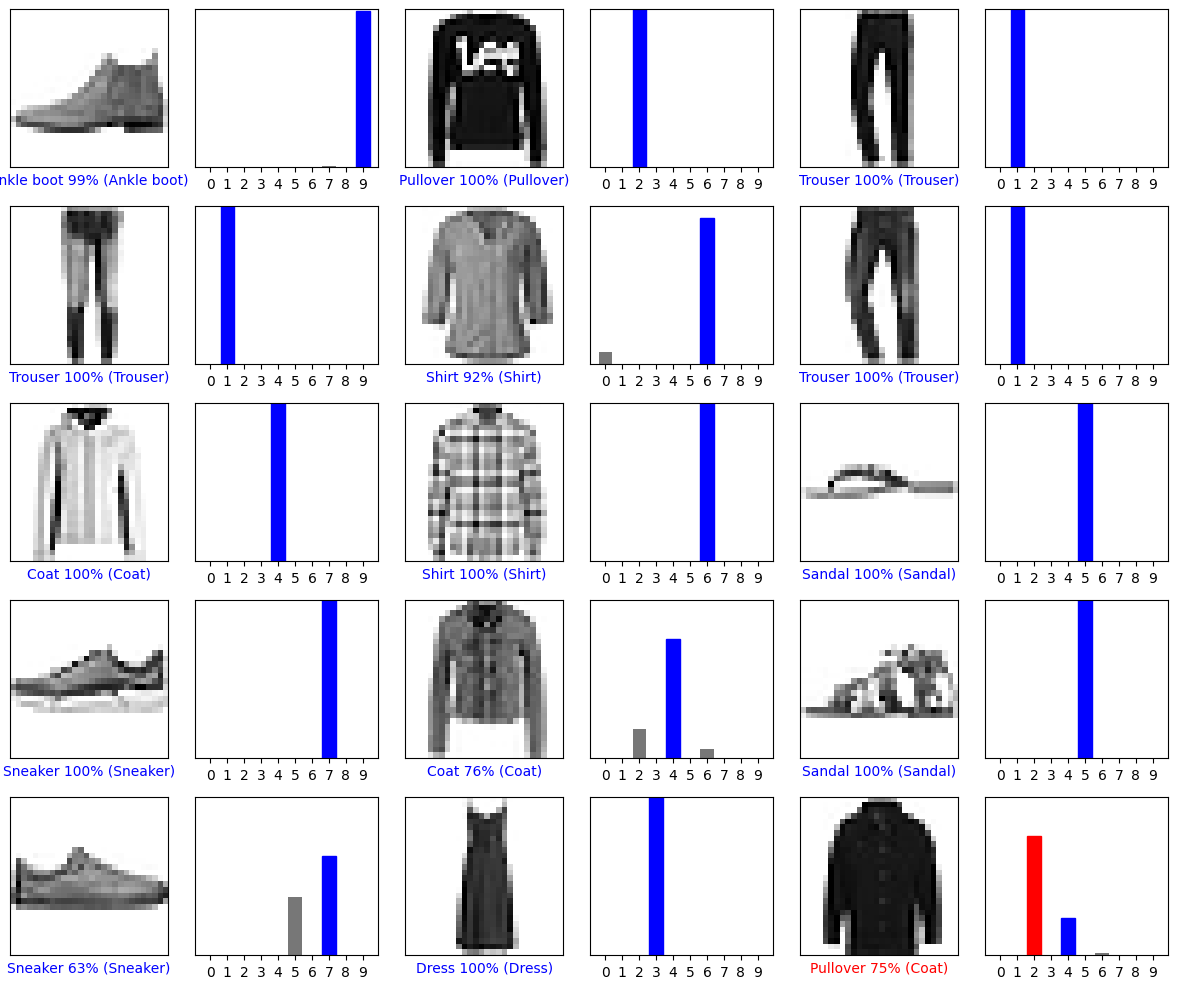

In [ ]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


# Example usage:
predictions_single = fun_model.predict(X_test)

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
  plot_image(i, predictions_single[i], y_test, X_test)
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
  plot_value_array(i, predictions_single[i], y_test)
plt.tight_layout()
plt.show()

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[..., 0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

